In [1]:
import re
import numpy as np
import pandas as pd
import json
from konlpy.tag import Mecab
m = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
df = pd.read_csv('C:/Users/SAMSUNG/NLP_TRY(Final project)/after_최종본/입체형_뉴네퓨어_kf94_대형_after2.csv')
with open('C:/Users/SAMSUNG/NLP_TRY(Final project)/SentiWord_info(3차 수정본).json', encoding='utf-8-sig', mode='r') as f:
        data = json.load(f)

In [2]:
res = []
for i in range(18569):
    res.append(df['review_content\r'][i])

In [3]:
res = "".join(res)

In [4]:
res = res.replace('!', '.').replace('?', '.').replace('~', '.').replace('\r', '.')

In [5]:
res = res.split('.')

## 착용감

In [43]:
evalution = []
for i in range(len(res)):
    if '착용감' in res[i]:
        evalution.append(res[i])

In [44]:
len(evalution)

380

In [45]:
def eval(review):
    result = []
    word_result = []
    pos = 0
    neg = 0
    word = m.morphs(review)
    
    for j in range(0, len(word)):
        for i in range(0, len(data)):
            if word[j] == data[i]['word_root']:
                result.append(data[i]['polarity'])
                word_result.append(data[i]['word'])
    for i in result:
        if i == 1:
            pos += 1
        elif i == -1:
            neg += 1
            
    return pos, neg, result,word_result
def fomula(pos, neg):
    if pos == 0 and neg == 0:
        return 0
    
    return ((pos - neg) / (pos + neg))

In [46]:
F = []
for i in range(380):
    review = evalution[i]
    
    pos, neg, result, word_result = eval(review)
    F.append(fomula(pos, neg))

In [47]:
F

[0.6363636363636364,
 0.0,
 1.0,
 1.0,
 0.7142857142857143,
 1.0,
 1.0,
 -0.52,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.3333333333333333,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 0.8823529411764706,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.05263157894736842,
 0.6,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.25925925925925924,
 -0.2222222222222222,
 0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 -0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.16666666666666666,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.3333333333333333,
 0.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 -0.5294117647058824,
 1.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 -0.5384615384615384,
 0.6,
 1.0,
 1.0,
 1.0,
 0.7391304347826086,
 1.0,
 1.0,
 0.3333

댓글 하나당 점수가 양수이면 긍정적인 댓글, 음수이면 부정적인 댓글로 계산이 된다.
이것을 아래의 함수 에 넣어서, 긍정적인 댓글과 부정적인 댓글의 비율로 계산할 수 있다.

In [48]:
def ration_F(F):
    plus = []
    minus = []
    for i in range(len(F)):
        if F[i] > 0: 
            plus.append(F[i])
        elif F[i] < 0: 
            minus.append(F[i])
    return (len(plus))/(len(plus)+len(minus))*100

In [49]:
ration_F(F)

88.08864265927978

착용감에 관해서 88%의 사람이 편안하다고 느꼈다.

In [50]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


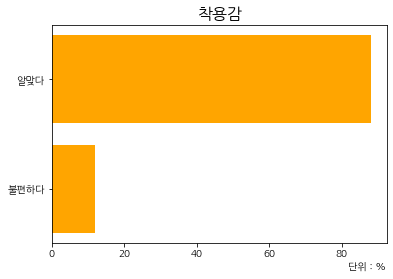

In [66]:
y = np.arange(2)
years = ['불편하다', '알맞다']
values = [12, 88]

plt.title('착용감', fontsize = 16)
plt.barh(y, values, color = 'orange')
plt.xlabel('단위 : %', loc = 'right')
plt.yticks(y, years)

plt.show()

## 호흡

In [52]:
eval_2 = []
for i in range(len(res)):
    if '숨' in res[i]:
        eval_2.append(res[i])

In [53]:
len(eval_2)

765

In [54]:
F = []
for i in range(765):
    review = eval_2[i]
    
    pos, neg, result, word_result = eval(review)
    F.append(fomula(pos, neg))

In [55]:
ration_F(F)

81.19891008174388

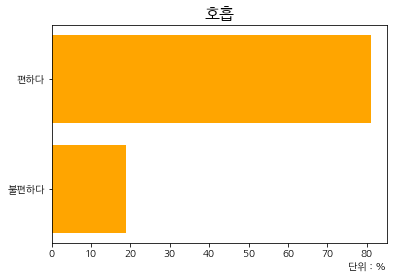

In [65]:
y = np.arange(2)
years = ['불편하다', '편하다']
values = [19, 81]

plt.title('호흡', fontsize = 16)
plt.barh(y, values, color = 'orange')
plt.xlabel('단위 : %', loc = 'right')
plt.yticks(y, years)

plt.show()

## 배송

In [57]:
eval_4 = []
for i in range(len(res)):
    if '배송' in res[i]:
        eval_4.append(res[i])

In [58]:
len(eval_4)

2224

In [59]:
F = []
for i in range(765):
    review = eval_4[i]
    
    pos, neg, result, word_result = eval(review)
    F.append(fomula(pos, neg))

In [60]:
ration_F(F)

95.81589958158996

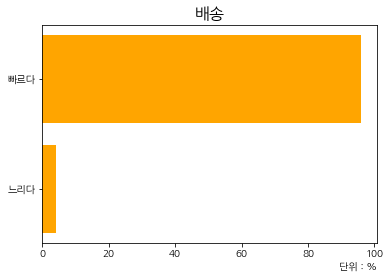

In [64]:
y = np.arange(2)
years = ['느리다', '빠르다']
values = [4, 96]

plt.title('배송', fontsize = 16)
plt.barh(y, values, color = 'orange')
plt.xlabel('단위 : %', loc = 'right')
plt.yticks(y, years)

plt.show()

## 사이즈

In [6]:
eval_3 = []
for i in range(len(res)):
    if '사이즈' in res[i]:
        eval_3.append(res[i])

In [7]:
large = []
small = []
fitted = []
for i in range(len(eval_3)):
    if (('크다' in eval_3[i]) or ('커' in eval_3[i])  or ('큰' in eval_3[i]) or ('큽' in eval_3[i]) or ('컸' in eval_3[i])):
        large.append(eval_3[i])
    elif (('작다' in eval_3[i]) or ('작' in eval_3[i])):
        small.append(eval_3[i])
    elif (('알맞다' in eval_3[i]) or ('잘 맞' in eval_3[i]) or ('적절' in eval_3[i]) or ('맞아요' in eval_3[i])or ('적당' in eval_3[i]) or ('넉넉' in eval_3[i])):
        fitted.append(eval_3[i])

사이즈를 언급한 리뷰 중 핵심 표현을 바탕으로 크다, 작다, 알맞다를 언급한 리뷰들을 모았습니다. 어느 정도 모호한 리뷰들도 있었지만, 대부분 정확히 사이즈의 크기를 언급하였습니다.

In [69]:
len(eval_3)

1159

In [70]:
len(fitted)

304

In [71]:
len(large)

208

In [72]:
len(small)

47

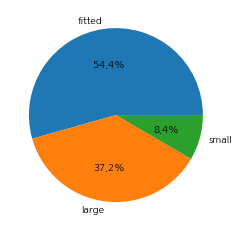

In [73]:
import matplotlib.pyplot as plt

ratio = [304, 208, 47]
labels = ['fitted', 'large', 'small']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [8]:
large

['크기가 커서 좋고 사이즈 조절도 가능해서 좋아요',
 ' 전 얼굴이 큰편은 아닌데 광대가 좀 있어서 대형쓰는데 이건 대형이어도 사이즈조절이 가능해서 더 좋고 끈은 칼국수끈은 아니지만 생각보다 귀도 안아파요',
 ' 사이즈 크서 얼큰이 남편이 좋아하고 귀걸이 튼튼하고 얼굴에 닿는 부분이 부드러워요',
 '큰사이즈로 귀가 안아파 좋음',
 ' KF94인데도 사이즈가 커서  답답하지 않고 얼굴사이즈에 맞게 조절할 수 있어서 좋아요',
 '끈 조절이 되고 큰 사이즈라 남자분들이 쓰기 좋아요',
 '사이즈커너  편하다고하네요',
 '사이즈가 커서 좋습니다',
 '얼굴이 큰편이라 사이즈가 적당하고 귀가 편해서 좋아요',
 '항상 쓰는제품이에요 사이즈가 커서 좋음',
 ' 그런데 리뉴얼되면서 사이즈가 살짝 커진것 같아요',
 '사이즈조절이 되어 얼큰이 초딩아들 잘맞습니다',
 '사이즈가 커서 좋아요 👍🏻',
 '사이즈가 넉넉해서 좋아요 평균보다 두상이 좀 큰 신랑이 착용했는데도 조이지 않고 널널하고, 끈조절이 가능해서 크게 나왔는데도 불구하고 들뜸없이 조절할 수 있었습니다 추천해요',
 '또 시켰어요 사이즈가 커서 편해요',
 '사이즈가 엄청 커서 좋아요',
 '하루종일 써야되는 상황에서 귀의 부담을 더는 끈 사이즈 조절이 큰 장점입니다',
 '사이즈 커서 얼큰이 남표니가 맘에 들어해요',
 '사이즈가 커요 편함',
 '네퓨어마스크 너무 답답하지않고 사이즈 큰편이라 좋아요',
 '오래썼을때 귀도 안아프고사이즈가 커서 좋아요',
 '두껍고 사이즈 커요',
 '사이즈가 커서 좋아요',
 '사이즈가 커서 좋아요',
 '가족이 항상 쓰는 제품입니다 얼굴 큰 울 신랑도 얼굴이 작은 딸도 사이즈를 맞출 수 있어 좋아요',
 '사이즈가  커서  편하고  좋음  끈으로  조절할수  있는  장점',
 '사이즈가 넉넉해서 얼굴 큰 분들에겐 너무 좋아요',
 ' 보@ 여전에꺼 좋았는데 이번에 사이즈도커지고좀잘안맞더라구요',
 '남편얼굴이 큰편인데 이건 사이즈넌ㅍ어져서 매번이거만주문해서 써